In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import openpyxl

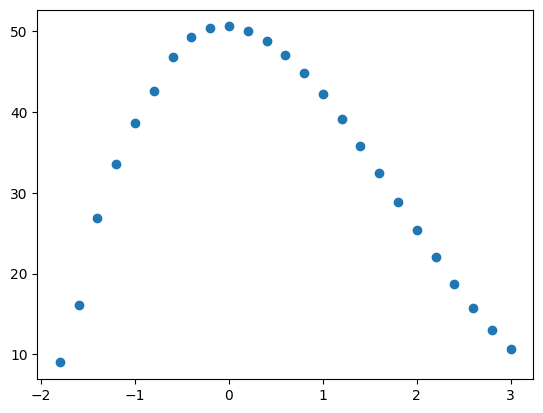

In [51]:
#Import data
from openpyxl import Workbook, load_workbook
book=load_workbook("Datos.xlsx",data_only=True)
sheets=book.sheetnames
rendija_izq=book[sheets[1]]
rendija_dere=book[sheets[2]]
rendija_izq["C4"].value
desplazamiento_rend_izq=[]
for cell in rendija_izq["B"]:
    if type(cell.value)!=str:
        desplazamiento_rend_izq.append(cell.value)
desplazamiento_rend_izq=np.array(desplazamiento_rend_izq[10:])

Voltaje_rend_izq=[]
for cell in rendija_izq["C"]:
    if type(cell.value)!=str:
        Voltaje_rend_izq.append(cell.value)

Voltaje_rend_izq=np.array(Voltaje_rend_izq[10:])

max=Voltaje_rend_izq.argmax()
pos_=desplazamiento_rend_izq[max]
desplazamiento_rend_izq=desplazamiento_rend_izq-pos_
filtro=desplazamiento_rend_izq<=3000
desplazamiento_rend_izq=desplazamiento_rend_izq[filtro]/1000 #Paso a mm
Voltaje_rend_izq=Voltaje_rend_izq[filtro]
plt.scatter(desplazamiento_rend_izq,Voltaje_rend_izq)







In [74]:
desplazamiento_rend_dere=[]

for m in rendija_dere["B"]:
    if type(m.value)!=str:
        desplazamiento_rend_dere.append(m.value)
desplazamiento_rend_dere=np.array(desplazamiento_rend_dere)

Voltaje_rend_dere=[]
for cell in rendija_dere["C"]:
    if type(cell.value)!=str:
        Voltaje_rend_dere.append(cell.value)
Voltaje_rend_dere=np.array(Voltaje_rend_dere)

filter_1=desplazamiento_rend_dere>=2000 

desplazamiento_rend_dere=desplazamiento_rend_dere[filter_1]
filter_2=desplazamiento_rend_dere<=5800
Voltaje_rend_dere=Voltaje_rend_dere[filter_1]
desplazamiento_rend_dere=desplazamiento_rend_dere[filter_2]
Voltaje_rend_dere=Voltaje_rend_dere[filter_2]

max_2=Voltaje_rend_dere.argmax()
pos_max=desplazamiento_rend_dere[max_2]
desplazamiento_rend_dere=(desplazamiento_rend_dere-pos_max)/1000

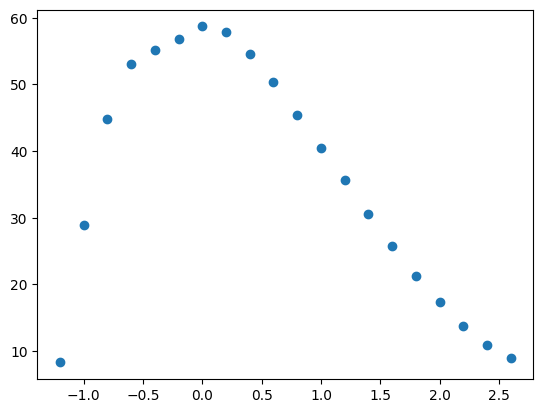

In [75]:
plt.scatter(desplazamiento_rend_dere,Voltaje_rend_dere)


In [150]:
def model_f(x,A,B,C,D):
    return A*(np.sin(B*x+C))**2+D
d=0.1
lambda_=670*10**-9
popt, pcov=curve_fit(model_f,desplazamiento_rend_izq,Voltaje_rend_izq,p0=[50,0.01,0.5,10])


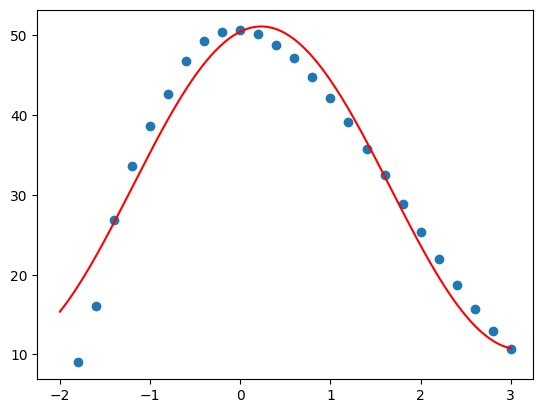

In [151]:
popt
#lambda=670nm 
#a=0.1mm

x_=np.linspace(-2,3,300)

plt.plot(x_,model_f(x_,*popt),"r")
plt.scatter(desplazamiento_rend_izq,Voltaje_rend_izq)

In [153]:
A,B,C,D=popt
B
lamb=d*np.pi/(B*10**3)
lamb*10**6

-573.6743199645624